# Import dipendeze

In [ ]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt

# Caricamento dati

In [ ]:
#Modifica la precisione nella visualizzazione delle cifre
pd.options.display.precision = 10

## Importa i dati dal file excel
df_DatiSensori = pd.read_excel('Dati_gruppo1.xlsx')

# Mostra tutte le colonne
# pd.set_option('display.max_rows', None)

# Pulizia dataset

In [ ]:
#Rinomina le colonne con carattersi speciali e assegna il valore di soglia 
df_DatiSensori.rename(columns = {'C6H6_ug/m3':'C6H6_ug_m3', 'H2S_ug/m3':'H2S_ug_m3', 'H2SJ_ug/m3':'H2SJ_ug_m3'}, inplace = True)
threshold = 24

# crea una copia del dataset per lavorarci
df_Dati = df_DatiSensori.copy()

In [ ]:
#Restituisce la lista con gli indici delle righe con almeno un valore di threshold di zeri consecutivi
def find_fail(colonna, df, threshold): 
    index, dizionario = {} , {}
    listaTagli, out  = [], []
    df1 =df[[colonna]].copy() 
    df1["Somma"] = df1.rolling(threshold).sum() 
    for i in df1.index: 
        if df1['Somma'][i] == 0: 
            index[i] = df1['Somma'][i] 
    indici = list(index.keys()) 
    for i in range(len(indici)-1): 
        if (indici[i+1] - indici[i] > 1): 
            listaTagli.append(i) 
    listaTagli.append(0) 
    listaTagli.sort() 
    for i in range(len(listaTagli)-1): 
        if i == 0: 
            dizionario[i] = indici[listaTagli[i]:listaTagli[i+1]+1] 
        else: 
            dizionario[i] = indici[listaTagli[i]+1:listaTagli[i+1]+1] 
    dizionario[len(dizionario.values())] = indici[listaTagli[-1]+1:] 
    if (len(dizionario[0]) == 0):
      return out
    else:
      for key in dizionario.keys(): 
          maxIndice= dizionario[key][0] 
          minIndice = maxIndice - threshold 
          maxIndice = maxIndice + len(dizionario[key]) - 1 
          out = out + list(np.arange(minIndice,maxIndice+1)) 
      return out

In [ ]:
# creo diversi dataframe quanti sono i sensori ed effettuo il controllo sui 24 zeri consecutivi ritenuti fallimento
# e infine effettuo il drop degli indici delle righe trovate
dfTRS = df_Dati[['TRS_ppb', 'TRS_stato']]
dfTRS = dfTRS.drop(find_fail('TRS_ppb', df_Dati, threshold)).reset_index()#TRS_ppb
dfVOC = df_Dati[['VOC_ppm', 'VOC_stato']]
dfVOC = dfVOC.drop(find_fail('VOC_ppm', df_Dati, threshold)).reset_index() #VOC
dfC6H6 = df_Dati[['C6H6_ug_m3', 'C6H6_stato']]
dfC6H6 = dfC6H6.drop(find_fail('C6H6_ug_m3', df_Dati, threshold)).reset_index().reset_index() #C6H6_ug/m3
dfH2S = df_Dati[['H2S_ug_m3', 'H2S_stato']]
dfH2S = dfH2S.drop(find_fail('H2S_ug_m3', df_Dati, threshold)).reset_index() #H2S_ug/m3
dfH2SJ = df_Dati[['H2SJ_ug_m3', 'H2SJ_stato']]
dfH2SJ = dfH2SJ.drop(find_fail('H2SJ_ug_m3', df_Dati, threshold)).reset_index() #H2SJ_ug/m3
dfPIDVOC = df_Dati[['PIDVOC_ppb', 'PIDVOC_stato']]
dfPIDVOC = dfPIDVOC.drop(find_fail('PIDVOC_ppb', df_Dati, threshold)).reset_index() #PIDVOC_ppb

In [ ]:
len(dfTRS)

In [ ]:
df_DatiPuliti = pd.concat([dfTRS[['TRS_ppb', 'TRS_stato']], dfVOC[['VOC_ppm', 'VOC_stato']],
                           dfC6H6[['C6H6_ug_m3', 'C6H6_stato']],dfH2S[['H2S_ug_m3', 'H2S_stato']],
                           dfH2SJ[['H2SJ_ug_m3', 'H2SJ_stato']],dfPIDVOC[['PIDVOC_ppb', 'PIDVOC_stato']]], axis=1)
df_DatiPuliti

In [ ]:
# elimina i valori ND
df_DatiPuliti = df_DatiPuliti[~df_Dati.TRS_stato.str.match('ND')]
df_DatiPuliti 

In [ ]:
# elimina i valori NaN 
df_DatiPuliti = df_Dati.dropna().reset_index(drop=True)
df_DatiPuliti

In [ ]:
df_copia = df_DatiPuliti.copy()

In [ ]:
# df_Dati
# scrive il dataset su disco
df_DatiPuliti.to_excel('datiPuliti.xlsx')

# # QUERY

# Query 1

In [ ]:
# query effettuata con un unico comando
# df_Benzene = df_DatiSensori.sort_values(by='C6H6_ug/m3', ascending =False)[['postazione', 'Data', 'C6H6_ug/m3']].head(100)

# creazione di un dataFrame ordinato in modo discendente per i valori di benzene
df_C6H6 = df_DatiPuliti.sort_values(by='C6H6_ug_m3', ascending =False).drop_duplicates(subset=['Data'])
# creazione di un dataFrame contenente i 100 maggiori valori di benzene
df_C6H6 = df_C6H6[['postazione', 'Data', 'C6H6_ug_m3']]
df_C6H6.head(100)

# Query 2

In [ ]:
# sensore H2S

# query effettuata con un unico comando
# df_H2S = df_DatiSensori.sort_values(by='H2S_ug/m3', ascending =False)[['postazione', 'Data', 'H2S_ug/m3']].head(100)

# creazione di un dataFrame ordinato in modo discendente per i valori di acido solfidrico del sensore H2S
df_H2S = df_DatiPuliti.sort_values(by='H2S_ug_m3', ascending =False).drop_duplicates(subset=['Data'])
# creazione di un dataFrame contenente i 100 maggiori valori di acido solfidrico del sensore H2SJ
df_H2S = df_H2S[['postazione', 'Data', 'H2S_ug_m3']].head(100)
df_H2S

In [ ]:
# sensore H2SJ

# query effettuata con un unico comando
# df_H2SJ = df_DatiSensori.sort_values(by='H2SJ_ug/m3', ascending =False)[['postazione', 'Data', 'H2SJ_ug/m3']].head(100)

# creazione di un dataFrame ordinato in modo discendente per i valori di acido solfidrico del sensore H2SJ
df_H2SJ = df_DatiPuliti.sort_values(by='H2SJ_ug_m3', ascending =False).drop_duplicates(subset=['Data'])
# creazione di un dataFrame contenente i 100 maggiori valori di acido solfidrico del sensore H2SJ
df_H2SJ = df_H2SJ[['postazione', 'Data', 'H2SJ_ug_m3']].head(100)
df_H2SJ

# Query 3

In [ ]:
# sensore VOC

# query effettuata con un unico comando
# df_VOC = df_DatiSensori.sort_values(by='VOC_ppm', ascending =True)[['postazione', 'Data', 'VOC_ppm']].head(100)

# creazione di un dataFrame ordinato in modo discendente per i valori del sensore VOC
df_VOC = df_DatiPuliti.sort_values(by='VOC_ppm', ascending =True).drop_duplicates(subset=['Data'])
# creazione di un dataFrame contenente i 100 più bassi valori del sensore VOC
df_VOC = df_VOC[['postazione', 'Data', 'VOC_ppm']].head(100)
df_VOC

In [ ]:
# sensore PIDVOC

# query effettuata con un unico comando
# df_PIDVOC = df_DatiSensori.sort_values(by='PIDVOC_ppb', ascending =True)[['postazione', 'Data', 'PIDVOC_ppb']].head(100)

# creazione di un dataFrame ordinato in modo discendente per i valori del sensore PIDVOC
df_PIDVOC = df_DatiPuliti.sort_values(by='PIDVOC_ppb', ascending =True).drop_duplicates(subset=['Data'])
# creazione di un dataFrame contenente i 100 più bassi valori del sensore PIDVOC
df_PIDVOC = df_PIDVOC[['postazione', 'Data', 'PIDVOC_ppb']].head(100)
df_PIDVOC

# Query 4

In [ ]:
# funzione che permette di eliminare i valori nulli, calcola la media oraria e restituisce un dataframe ordinato sull'ora
def media_oraria(df, compound ):
  df1 = df[['postazione', 'Data', compound]].copy()
  df1['Data'] = pd.to_datetime(df1['Data'])
  df1 = df1[df1[compound].notna()]
  indexName = df1[(df1[compound]==0)].index
  df1.drop(indexName, inplace = True)
  return df1[['Data', compound]].resample("H", label = 'right', on = 'Data').mean()

In [ ]:
# Creazione dataframe ordinato sulla media oraria
df_C6H6avg = media_oraria(df_DatiPuliti, 'C6H6_ug_m3')
df_C6H6avg

In [ ]:
# Stampa le 50 ore con i livelli di benzene più alti
df_C6H6Max = df_C6H6avg.sort_values('C6H6_ug_m3', ascending = False).head(50)
df_C6H6Max

In [ ]:
# Stampa le 50 ore con i livelli di benzene più bassi
df_C6H6Min = df_C6H6avg.sort_values('C6H6_ug_m3', ascending = True).head(50)
df_C6H6Min

# Query 5

In [ ]:
#Elimina i valori nulli e calcola la media oraria sul dataframe creato per il sensore H2S
df_H2Savg = media_oraria(df_DatiPuliti, 'H2S_ug_m3')

In [ ]:
# Stampa le 50 ore con i livelli di acido solfidrico del sensore H2S più alti
df_H2SMax= df_H2Savg.sort_values('H2S_ug_m3', ascending = False).head(50)
df_H2SMax

In [ ]:
# Stampa le 50 ore con i livelli di acido solfidrico del sensore H2S più basso
df_H2SMin= df_H2Savg.sort_values('H2S_ug_m3', ascending = True).head(50)
df_H2SMin

In [ ]:
#Elimina i valori nulli e calcola la media oraria sul dataframe creato per il sensore H2SJ
df_H2SJavg = media_oraria(df_DatiPuliti, 'H2SJ_ug_m3')

In [ ]:
# Stampa le 50 ore con i livelli di acido solfidrico del sensore H2SJ più alti
df_H2SJMax= df_H2SJavg.sort_values('H2SJ_ug_m3', ascending = False).head(50)
df_H2SJMax

In [ ]:
# Stampa le 50 ore con i livelli di acido solfidrico del sensore H2SJ più bassi
df_H2SJMin= df_H2SJavg.sort_values('H2SJ_ug_m3', ascending = True).head(50)
df_H2SJMin

# Query 6

In [ ]:
#Elimina i valori nulli e calcola la media oraria sul dataframe creato per il sensore VOC
df_VOCavg = media_oraria(df_DatiPuliti, 'VOC_ppm')

In [ ]:
# Stampa le 50 ore con i livelli di VOC del sensore VOC più alti
df_VOCMax= df_VOCavg.sort_values('VOC_ppm', ascending = False).head(50)
df_VOCMax

In [ ]:
# Stampa le 50 ore con i livelli di VOC del sensore VOC più bassi
df_VOCMin= df_VOCavg.sort_values('VOC_ppm', ascending = True).head(50)
df_VOCMin

In [ ]:
#Elimina i valori nulli e calcola la media oraria sul dataframe creato per il sensore PIDVOC
df_PIDVOCavg = media_oraria(df_DatiPuliti, 'PIDVOC_ppb')

In [ ]:
# Stampa le 50 ore con i livelli di VOC del sensore PIDVOC più alti
df_PIDVOCMax= df_PIDVOCavg.sort_values('PIDVOC_ppb', ascending = False).head(50)
df_PIDVOCMax

In [ ]:
# Stampa le 50 ore con i livelli di VOC del sensore PIDVOC più bassi
df_PIDVOCMin= df_PIDVOCavg.sort_values('PIDVOC_ppb', ascending = True).head(50)
df_PIDVOCMin

# Query 7 & 8

In [ ]:
# Giornate con fallimenti ND (i fallimenti nell'invio dei dati sono uguali per ogni sensore)
df_Fail_ND = df_DatiSensori[['Data','TRS_ppb','VOC_ppm','C6H6_ug_m3','H2S_ug_m3','H2SJ_ug_m3','PIDVOC_ppb']].copy()
df_Fail_ND['Giorno'] = pd.to_datetime(df_Fail_ND['Data'].dt.strftime('%Y/%m/%d'))
df_Fail_ND = df_Fail_ND.TRS_ppb.isnull().groupby(df_Fail_ND['Giorno']).sum().transform(int).reset_index(name='count')
df_Fail_ND

In [ ]:
# 3 giorni con il maggior numero di fallimenti
df_Fail_ND.sort_values('count', ascending = False).head(3)

In [ ]:
# 3 giorni con il minor numero di fallimenti
df_Fail_ND.sort_values('count', ascending = True).head(3)

# Query 9, 10 e 11

In [ ]:
# crea due liste con tutti gli inquinanti e i relativi stati
inquinanti = ['TRS_ppb','VOC_ppm','C6H6_ug_m3','H2S_ug_m3','H2SJ_ug_m3','PIDVOC_ppb']
stato_Inquinanti = ['TRS_stato','VOC_stato','C6H6_stato', 'H2S_stato','H2SJ_stato', 'PIDVOC_stato']

In [ ]:
# crea un dataframe che contiene la somma dei fallimenti 
# oltre alle righe con 'ND' che indicano il fallimento nel trasmettere i dati, consideriamo fallimento
# anche la presenza consecutiva massiccia di valori 0
fails = []
df_NFails = pd.DataFrame({'Fallimenti':np.arange(6)})
df_NFails = pd.DataFrame({'Sensori':np.arange(6)})
for column in range(len(inquinanti)):
    df_Fail = df_Dati[[inquinanti[column], stato_Inquinanti[column]]].copy()
    errors = df_Fail[inquinanti[column]].ne(df_Fail
                                  [inquinanti[column]].shift()).cumsum()[df_Fail
                                                                         [inquinanti[column]].eq(0.0)].value_counts().ge(24).sum()
    num_ND= df_Fail[stato_Inquinanti[column]].value_counts()["ND"]
    fails.append(num_ND + errors)

df_NFails['Sensori'] = inquinanti
df_NFails['Fallimenti'] = fails
df_NFails


## Query 9

In [ ]:
df_NFails.at[0, 'Dati TOT'] = len(dfTRS)
df_NFails.at[1, 'Dati TOT'] = len(dfVOC)
df_NFails.at[2, 'Dati TOT'] = len(dfC6H6)
df_NFails.at[3, 'Dati TOT'] = len(dfH2S)
df_NFails.at[4, 'Dati TOT'] = len(dfH2SJ)
df_NFails.at[5, 'Dati TOT'] = len(dfPIDVOC)
df_NFails['Media'] = df_NFails['Fallimenti'].div(df_NFails['Dati TOT'])
df_NFails

## Query 10

In [ ]:
# Prende il massimo dal dataframe
df_NFails['Fallimenti'].max()

## Query 11

In [ ]:
# Prende il minimo dal dataframe
df_NFails['Fallimenti'].min()

In [ ]:
# ANALISI VISUALE

In [ ]:
# Creazione di un dataset per la media oraria

In [ ]:
df_TRSavg = media_oraria(df_DatiPuliti, 'TRS_ppb')
df_MediaOraria = pd.concat([df_TRSavg, df_C6H6avg['C6H6_ug_m3'] ,df_H2Savg['H2S_ug_m3'], df_H2SJavg['H2SJ_ug_m3'], df_VOCavg['VOC_ppm'], df_PIDVOCavg['PIDVOC_ppb']], axis=1)
df_MediaOraria
# df_MediaOraria.to_excel('media_oraria.xlsx')

# # CORRELAZIONI

In [ ]:
# Funzione correlazione
def corr_Sensori1(df, colonna1, colonna2, postazione = None):
    if postazione != None:
        df1 = df[df['postazione'] == postazione]
    else:
        df1 = df.copy()
    df1.plot.scatter(x= colonna1, y=colonna2)
    a,b = np.polyfit(df1[colonna1].to_list(), df1[colonna2].to_list(), 1) #Inferiamo y =ax + b
    x1 = min(df1[colonna1].to_list())
    x2 = max(df1[colonna1].to_list())
    plt.plot([x1,x2], [a*x1 +b, a*x2 +b], color = 'red')
    plt.show()
    cc = np.corrcoef(df1[colonna1], df1[colonna2])[1,0]
    cs = df1[[colonna1, colonna2]].corr(method = 'spearman')
    ck = df1[[colonna1, colonna2]].corr(method = 'kendall')
    return cc, cs.iloc[1,0], ck.iloc[1,0]

In [ ]:
# Funzione correlazione
def corr_Sensori(df, colonna1, colonna2, postazione = None):
    cc = -2
    cs = pd.DataFrame([{'a': 0},{'a': -2}])
    ck = pd.DataFrame([{'a': 0},{'a': -2}])
    if postazione != None:
        df1 = df[df['postazione'] == postazione]
    else:
        df1 = df.copy()
    df1.plot.scatter(x= colonna1, y=colonna2)
    if np.sum(df1[colonna1].to_list())!=0 and np.sum(df1[colonna2].to_list()) !=0:
        a,b = np.polyfit(df1[colonna1].to_list(), df1[colonna2].to_list(), 1) #Inferiamo y =ax + b
        x1 = min(df1[colonna1].to_list())
        x2 = max(df1[colonna1].to_list())
        plt.plot([x1,x2], [a*x1 +b, a*x2 +b], color = 'red')
        plt.show()
        cc = np.corrcoef(df1[colonna1], df1[colonna2])[1,0]
        cs = df1[[colonna1, colonna2]].corr(method = 'spearman')
        ck = df1[[colonna1, colonna2]].corr(method = 'kendall')  
    return cc, cs.iloc[1,0], ck.iloc[1,0]

# CORRELAZIONE 1 TRA I SENSORI H2S E H2SJ NELLE VARIE POSTAZIONI

In [ ]:
# Crea un dataframe contenente entrambi i sensori, rinomina le colonne ed elimina i valori nulli
df_AcidoSolf = df_DatiPuliti[['postazione', 'Data', 'H2S_ug_m3', 'H2SJ_ug_m3']]
df_AcidoSolf = df_AcidoSolf.dropna()
df_AcidoSolf

In [ ]:
# correlazione per la stazione ATM05_01479
pearson, spearman, kendall= corr_Sensori(df_AcidoSolf, 'H2S_ug_m3', 'H2SJ_ug_m3','ATM05_01479')
print('Correlazione tra H2S e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM07_01480
pearson, spearman, kendall = corr_Sensori(df_AcidoSolf, 'H2S_ug_m3', 'H2SJ_ug_m3', 'ATM07_01480')
print('Correlazione tra H2S e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM10_01481
pearson, spearman, kendall = corr_Sensori(df_AcidoSolf, 'H2S_ug_m3', 'H2SJ_ug_m3', 'ATM10_01481' )
print('Correlazione tra H2S e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM14_01486
pearson, spearman, kendall= corr_Sensori(df_AcidoSolf, 'H2S_ug_m3', 'H2SJ_ug_m3', 'ATM14_01486' )
print('Correlazione tra H2S e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

# CORRELAZIONE 2 TRA I SENSORI VOC E PIDVOC NELLE VARIE POSTAZIONI

In [ ]:
# Crea un dataframe contenente entrambi i sensori, rinomina le colonne ed elimina i valori nulli
df_SensoriVOC = df_DatiPuliti[['postazione', 'Data', 'VOC_ppm', 'PIDVOC_ppb']]
df_SensoriVOC = df_SensoriVOC.dropna()
df_SensoriVOC

In [ ]:
# correlazione per la stazione ATM05_01479
pearson, spearman, kendall= corr_Sensori(df_SensoriVOC, 'VOC_ppm', 'PIDVOC_ppb', 'ATM05_01479' )
print('Correlazione tra VOC e PIDVOC:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM07_01480
pearson, spearman, kendall = corr_Sensori(df_SensoriVOC, 'VOC_ppm', 'PIDVOC_ppb', 'ATM07_01480' )
print('Correlazione tra VOC e PIDVOC:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM10_01481
pearson, spearman, kendall = corr_Sensori(df_SensoriVOC, 'VOC_ppm', 'PIDVOC_ppb' , 'ATM10_01481')
print('Correlazione tra VOC e PIDVOC:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM14_01486
pearson, spearman, kendall= corr_Sensori(df_SensoriVOC, 'VOC_ppm', 'PIDVOC_ppb', 'ATM14_01486' )
print('Correlazione tra VOC e PIDVOC:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

# CORRELAZIONE 3 TRA I SENSORI TRS E H2S NELLE VARIE POSTAZIONI

In [ ]:
df_SenTRS_H2S = df_DatiPuliti[['postazione', 'Data', 'TRS_ppb', 'H2S_ug_m3']]
df_SenTRS_H2S = df_SenTRS_H2S.dropna()
df_SenTRS_H2S.fillna(0)

In [ ]:
# correlazione per la stazione ATM05_01479
pearson, spearman, kendall = corr_Sensori(df_SenTRS_H2S, 'TRS_ppb', 'H2S_ug_m3', 'ATM05_01479' )
print('Correlazione tra TRS e H2S:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM07_01480
pearson, spearman, kendall= corr_Sensori(df_SenTRS_H2S, 'TRS_ppb', 'H2S_ug_m3', 'ATM07_01480' )
print('Correlazione tra TRS e H2S:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM10_01481
pearson, spearman, kendall= corr_Sensori(df_SenTRS_H2S, 'TRS_ppb', 'H2S_ug_m3', 'ATM10_01481' )
print('Correlazione tra TRS e H2S:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM14_01486
pearson, spearman, kendall= corr_Sensori(df_SenTRS_H2S, 'TRS_ppb', 'H2S_ug_m3', 'ATM14_01486' )
print('Correlazione tra TRS e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

# CORRELAZIONE 4 TRA I SENSORI TRS E H2SJ NELLE VARIE POSTAZIONI

In [ ]:
df_SenTRS_H2SJ = df_DatiPuliti[['postazione', 'Data', 'TRS_ppb', 'H2SJ_ug_m3']]
df_SenTRS_H2SJ = df_SenTRS_H2SJ.dropna()
df_SenTRS_H2SJ

In [ ]:
# correlazione per la stazione ATM05_01479
pearson, spearman, kendall= corr_Sensori(df_SenTRS_H2SJ, 'TRS_ppb', 'H2SJ_ug_m3' , 'ATM05_01479')
print('Correlazione tra TRS e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM07_01480
pearson, spearman, kendall= corr_Sensori(df_SenTRS_H2SJ, 'TRS_ppb', 'H2SJ_ug_m3', 'ATM07_01480' )
print('Correlazione tra TRS e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM10_01481
pearson, spearman, kendall= corr_Sensori(df_SenTRS_H2SJ, 'TRS_ppb', 'H2SJ_ug_m3' , 'ATM10_01481')
print('Correlazione tra TRS e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM14_01486
pearson, spearman, kendall= corr_Sensori(df_SenTRS_H2SJ, 'TRS_ppb', 'H2SJ_ug_m3' , 'ATM14_01486')
print('Correlazione tra TRS e H2SJ:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

# CORRELAZIONE 5 TRA I SENSORI VOC E C6H6 NELLE VARIE POSTAZIONI

In [ ]:
df_SenVOC_C6H6 = df_DatiPuliti[['postazione', 'Data', 'VOC_ppm', 'C6H6_ug_m3']]
df_SenVOC_C6H6 = df_SenVOC_C6H6.dropna()
df_SenVOC_C6H6

In [ ]:
# correlazione per la stazione ATM05_01479
pearson, spearman, kendall= corr_Sensori(df_SenVOC_C6H6, 'VOC_ppm', 'C6H6_ug_m3' , 'ATM05_01479')
print('Correlazione tra VOC e C6H6:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM07_01480
pearson, spearman, kendall= corr_Sensori(df_SenVOC_C6H6, 'VOC_ppm', 'C6H6_ug_m3', 'ATM07_01480' )
print('Correlazione tra VOC e C6H6:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM10_01481
pearson, spearman, kendall= corr_Sensori(df_SenVOC_C6H6, 'VOC_ppm', 'C6H6_ug_m3' , 'ATM10_01481')
print('Correlazione tra VOC e C6H6:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM14_01486
pearson, spearman, kendall= corr_Sensori(df_SenVOC_C6H6, 'VOC_ppm', 'C6H6_ug_m3', 'ATM14_01486' )
print('Correlazione tra VOC e C6H6:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

# CORRELAZIONE 6 TRA I SENSORI PIDVOC E C6H6 NELLE VARIE POSTAZIONI

In [ ]:
df_SenPIDVOC_C6H6 = df_DatiPuliti[['postazione', 'Data', 'PIDVOC_ppb', 'C6H6_ug_m3']]
df_SenPIDVOC_C6H6 = df_SenPIDVOC_C6H6.dropna()
df_SenPIDVOC_C6H6

In [ ]:
# correlazione per la stazione ATM05_01479
pearson, spearman, kendall= corr_Sensori(df_SenPIDVOC_C6H6, 'PIDVOC_ppb', 'C6H6_ug_m3', 'ATM05_01479' )
print('Correlazione tra PIDVOC e C6H6:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM07_01480
pearson, spearman, kendall= corr_Sensori(df_SenPIDVOC_C6H6, 'PIDVOC_ppb', 'C6H6_ug_m3' , 'ATM07_01480')
print('Correlazione tra PIDVOC e C6H6:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM10_01481
pearson, spearman, kendall= corr_Sensori(df_SenPIDVOC_C6H6, 'PIDVOC_ppb', 'C6H6_ug_m3', 'ATM10_01481' )
print('Correlazione tra PIDVOC e C6H6:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

In [ ]:
# correlazione per la stazione ATM14_01486
pearson, spearman, kendall= corr_Sensori(df_SenPIDVOC_C6H6, 'PIDVOC_ppb', 'C6H6_ug_m3', 'ATM14_01486' )
print('Correlazione tra PIDVOC e C6H6:\npearson: ', pearson,' spearman: ', spearman,' kendall: ', kendall)

# CORRELAZIONE 7 

# POSTAZIONI ATM05_01479 E ATM07_01480 

In [ ]:
def creazione_df(df, colonna1, colonna2, composto, df2 = None):
    df_1 = df[df['postazione'] == colonna1].dropna()[composto].reset_index(drop = True).to_frame()
    if df2 is None:
        df_2 = df.copy()
        df_2 = df_2[df_2['postazione'] == colonna2].dropna()[composto].reset_index(drop = True).to_frame()
    else:
        df_2 = df2.copy()
        df_2 = df_2[colonna2].dropna().reset_index(drop = True).to_frame()
    df_Full = pd.concat([df_1, df_2], axis=1)
    df_Full.columns = [colonna1,colonna2]
    df_Full = df_Full[[colonna1,colonna2]].fillna(0)
    return df_Full

In [ ]:
# correlazione per il sensore TRS_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'TRS_ppb' ),
                                         'ATM05_01479', 'ATM07_01480')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'C6H6_ug_m3' ), 'ATM05_01479', 'ATM07_01480')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore VOC_ppm
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'VOC_ppm' ), 'ATM05_01479', 'ATM07_01480')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore PIDVOC_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'PIDVOC_ppb' ), 'ATM05_01479', 'ATM07_01480')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'H2S_ug_m3' ), 'ATM05_01479', 'ATM07_01480')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM07_01480', 'H2SJ_ug_m3' ), 'ATM05_01479', 'ATM07_01480')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

# POSTAZIONI ATM05_01479 E ATM10_01481

In [ ]:
# correlazione per il sensore TRS_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'TRS_ppb' ), 'ATM05_01479', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'C6H6_ug_m3' ), 'ATM05_01479', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore VOC_pp
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'VOC_ppm' ), 'ATM05_01479', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore PIDVOC_ppm
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'PIDVOC_ppb' ), 'ATM05_01479', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'H2S_ug_m3' ), 'ATM05_01479', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM10_01481', 'H2SJ_ug_m3' ), 'ATM05_01479', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

# POSTAZIONI ATM05_01479 E ATM14_01486

In [ ]:
# correlazione per il sensore TRS_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'TRS_ppb' ), 'ATM05_01479', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'C6H6_ug_m3' ), 'ATM05_01479', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore VOC_ppm
pearsonPost4, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'VOC_ppm' ), 'ATM05_01479', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore PIDVOC_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'PIDVOC_ppb' ), 'ATM05_01479', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'H2S_ug_m3' ), 'ATM05_01479', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM05_01479', 'ATM14_01486', 'H2SJ_ug_m3' ), 'ATM05_01479', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

# POSTAZIONI ATM07_01480 E ATM10_01481

In [ ]:
# correlazione per il sensore TRS_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'TRS_ppb' ), 'ATM07_01480', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'C6H6_ug_m3' ), 'ATM07_01480', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore VOC_ppm
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'VOC_ppm' ), 'ATM07_01480', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore PIDVOC_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'PIDVOC_ppb' ), 'ATM07_01480', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'H2S_ug_m3' ), 'ATM07_01480', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM10_01481', 'H2SJ_ug_m3' ), 'ATM07_01480', 'ATM10_01481')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

# POSTAZIONI ATM07_01480 E ATM14_01486

In [ ]:
# correlazione per il sensore TRS_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'TRS_ppb' ), 'ATM07_01480', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'C6H6_ug_m3' ), 'ATM07_01480', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore VOC_ppm
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'VOC_ppm' ), 'ATM07_01480', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore PIDVOC_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'PIDVOC_ppb' ), 'ATM07_01480', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'H2S_ug_m3' ), 'ATM07_01480', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM07_01480', 'ATM14_01486', 'H2SJ_ug_m3' ), 'ATM07_01480', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

# POSTAZIONI ATM10_01481 E ATM14_01486

In [ ]:
# correlazione per il sensore TRS_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM10_01481', 'ATM14_01486', 'TRS_ppb' ), 'ATM10_01481', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore C6H6_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM10_01481', 'ATM14_01486', 'C6H6_ug_m3' ), 'ATM10_01481', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore VOC_ppm
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM10_01481', 'ATM14_01486', 'VOC_ppm' ), 'ATM10_01481', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore PIDVOC_ppb
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM10_01481', 'ATM14_01486', 'PIDVOC_ppb' ), 'ATM10_01481', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore H2S_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM10_01481', 'ATM14_01486', 'H2S_ug_m3' ), 'ATM10_01481', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione per il sensore H2SJ_ug_m3
pearson, spearman, kendall= corr_Sensori(creazione_df(df_Dati, 'ATM10_01481', 'ATM14_01486', 'H2SJ_ug_m3' ), 'ATM10_01481', 'ATM14_01486')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

# CORRELAZIONE 8

In [13]:
df_DatiMeteo = pd.read_excel('Dati_Meteo.xlsx')

In [ ]:
df_DatiMeteo

In [ ]:
# crea un dataframe composto dalla media oraria dei sensori in base alla stazione scelta
def media_Stazione(df, postazione):
    df1 = df[df['postazione'] == postazione]
    df2 = pd.concat([media_oraria(df1, 'C6H6_ug_m3')['C6H6_ug_m3'],
                      media_oraria(df1, 'H2S_ug_m3')['H2S_ug_m3'],
                      media_oraria(df1, 'H2SJ_ug_m3')['H2SJ_ug_m3'],
                      media_oraria(df1, 'VOC_ppm')['VOC_ppm'], 
                      media_oraria(df1, 'PIDVOC_ppb')['PIDVOC_ppb']], axis=1)
    if postazione == 'ATM14_01486':
        df2['TRS_ppb'] = 0
    else:
        df2['TRS_ppb'] = media_oraria(df1, 'TRS_ppb')['TRS_ppb']
    return df2

In [36]:
stazione = ['ATM05_01479','ATM07_01480','ATM10_01481', 'ATM14_01486']
sensore = ['TRS_ppb','C6H6_ug_m3', 'VOC_ppm', 'PIDVOC_ppb', 'H2S_ug_m3', 'H2SJ_ug_m3']
meteo = ['temperatura_gradiC', 'direzione_vento_gradi','pressione_hPa', 'intensità_vento_km_h' ]

In [ ]:
# correlazione con la temperatura per il sensore ATM05_01479 
df_ATM5 = media_Stazione(df_DatiPuliti, stazione[0]).fillna(0)
df_ATM5['postazione'] = 'ATM05_01479'
df_ATM5

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[0], sensore[0], df2 = df_DatiMeteo), stazione[0], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[0], sensore[1], df2 = df_DatiMeteo), stazione[0], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[0], sensore[2], df2 = df_DatiMeteo), stazione[0], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[0], sensore[3], df2 = df_DatiMeteo), stazione[0], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[0], sensore[4], df2 = df_DatiMeteo), stazione[0], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[0], sensore[5], df2 = df_DatiMeteo), stazione[0], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione con la temperatura per il sensore ATM07_01480
df_ATM7 = media_Stazione(df_DatiPuliti, stazione[1]).fillna(0)
df_ATM7['postazione'] = 'ATM07_01480'
df_ATM7


In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[0], sensore[0], df2 = df_DatiMeteo), stazione[1], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[0], sensore[1], df2 = df_DatiMeteo), stazione[1], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[0], sensore[2], df2 = df_DatiMeteo), stazione[1], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[0], sensore[3], df2 = df_DatiMeteo), stazione[1], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[0], sensore[4], df2 = df_DatiMeteo), stazione[1], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[0], sensore[5], df2 = df_DatiMeteo), stazione[1], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione con la temperatura per il sensore ATM10_01481
df_ATM10 = media_Stazione(df_DatiPuliti, stazione[2]).fillna(0)
df_ATM10['postazione'] = 'ATM10_01481'
df_ATM10

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[0], sensore[0], df2 = df_DatiMeteo), stazione[2], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[0], sensore[1], df2 = df_DatiMeteo), stazione[2], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[0], sensore[2], df2 = df_DatiMeteo), stazione[2], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[0], sensore[3], df2 = df_DatiMeteo), stazione[2], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[0], sensore[4], df2 = df_DatiMeteo), stazione[2], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[0], sensore[5], df2 = df_DatiMeteo), stazione[2], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione con la temperatura per il sensore ATM14_01486
df_ATM14 = media_Stazione(df_DatiPuliti, stazione[3]).fillna(0)
df_ATM14['postazione'] = 'ATM14_01486'
df_ATM14


In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[0], sensore[0], df2 = df_DatiMeteo), stazione[3], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[0], sensore[1], df2 = df_DatiMeteo), stazione[3], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[0], sensore[2], df2 = df_DatiMeteo), stazione[3], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[0], sensore[3], df2 = df_DatiMeteo), stazione[3], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[0], sensore[4], df2 = df_DatiMeteo), stazione[3], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall) 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[0], sensore[5], df2 = df_DatiMeteo), stazione[3], meteo[0])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

# CORRELAZIONE 9

In [ ]:
# correlazione con la direzione del vento per il sensore ATM05_01479 
df_ATM5 = media_Stazione(df_DatiPuliti, stazione[0]).fillna(0)
df_ATM5['postazione'] = 'ATM05_01479'
df_ATM5

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[1], sensore[0], df2 = df_DatiMeteo), stazione[0], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[1], sensore[1], df2 = df_DatiMeteo), stazione[0], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[1], sensore[2], df2 = df_DatiMeteo), stazione[0], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[1], sensore[3], df2 = df_DatiMeteo), stazione[0], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[1], sensore[4], df2 = df_DatiMeteo), stazione[0], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[1], sensore[5], df2 = df_DatiMeteo), stazione[0], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione con la direzione del vento per il sensore ATM07_01480
df_ATM7 = media_Stazione(df_DatiPuliti, stazione[1]).fillna(0)
df_ATM7['postazione'] = 'ATM07_01480'
df_ATM7


In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[1], sensore[0], df2 = df_DatiMeteo), stazione[1], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[1], sensore[1], df2 = df_DatiMeteo), stazione[1], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[1], sensore[2], df2 = df_DatiMeteo), stazione[1], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[1], sensore[3], df2 = df_DatiMeteo), stazione[1], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[1], sensore[4], df2 = df_DatiMeteo), stazione[1], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[1], sensore[5], df2 = df_DatiMeteo), stazione[1], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione con la direzione del vento per il sensore ATM10_01481
df_ATM10 = media_Stazione(df_DatiPuliti, stazione[2]).fillna(0)
df_ATM10['postazione'] = 'ATM10_01481'
df_ATM10


In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[1], sensore[0], df2 = df_DatiMeteo), stazione[2], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[1], sensore[1], df2 = df_DatiMeteo), stazione[2], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)


In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[1], sensore[2], df2 = df_DatiMeteo), stazione[2], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[1], sensore[3], df2 = df_DatiMeteo), stazione[2], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[1], sensore[4], df2 = df_DatiMeteo), stazione[2], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[1], sensore[5], df2 = df_DatiMeteo), stazione[2], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione con la direzione del vento per il sensore ATM14_01486
df_ATM14 = media_Stazione(df_DatiPuliti, stazione[3]).fillna(0)
df_ATM14['postazione'] = 'ATM14_01486'
df_ATM14

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[1], sensore[0], df2 = df_DatiMeteo), stazione[3], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[1], sensore[1], df2 = df_DatiMeteo), stazione[3], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[1], sensore[2], df2 = df_DatiMeteo), stazione[3], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[1], sensore[3], df2 = df_DatiMeteo), stazione[3], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[1], sensore[4], df2 = df_DatiMeteo), stazione[3], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[1], sensore[5], df2 = df_DatiMeteo), stazione[3], meteo[1])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

# CORRELAZIONE 10

In [ ]:
# correlazione con la pressione atmosferica per il sensore ATM05_01479 
df_ATM5 = media_Stazione(df_DatiPuliti, stazione[0]).fillna(0)
df_ATM5['postazione'] = 'ATM05_01479'
df_ATM5

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[2], sensore[0], df2 = df_DatiMeteo), stazione[0], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[2], sensore[1], df2 = df_DatiMeteo), stazione[0], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[2], sensore[2], df2 = df_DatiMeteo), stazione[0], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[2], sensore[3], df2 = df_DatiMeteo), stazione[0], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[2], sensore[4], df2 = df_DatiMeteo), stazione[0], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[2], sensore[5], df2 = df_DatiMeteo), stazione[0], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione con la pressione atmosferica per il sensore ATM07_01480
df_ATM7 = media_Stazione(df_DatiPuliti, stazione[1]).fillna(0)
df_ATM7['postazione'] = 'ATM07_01480'
df_ATM7

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[2], sensore[0], df2 = df_DatiMeteo), stazione[1], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[2], sensore[1], df2 = df_DatiMeteo), stazione[1], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[2], sensore[2], df2 = df_DatiMeteo), stazione[1], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[2], sensore[3], df2 = df_DatiMeteo), stazione[1], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[2], sensore[4], df2 = df_DatiMeteo), stazione[1], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[2], sensore[5], df2 = df_DatiMeteo), stazione[1], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione con la pressione atmosferica per il sensore ATM10_01481
df_ATM10 = media_Stazione(df_DatiPuliti, stazione[2]).fillna(0)
df_ATM10['postazione'] = 'ATM10_01481'
df_ATM10

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[2], sensore[0], df2 = df_DatiMeteo), stazione[2], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[2], sensore[1], df2 = df_DatiMeteo), stazione[2], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[2], sensore[2], df2 = df_DatiMeteo), stazione[2], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[2], sensore[3], df2 = df_DatiMeteo), stazione[2], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[2], sensore[4], df2 = df_DatiMeteo), stazione[2], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[2], sensore[5], df2 = df_DatiMeteo), stazione[2], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione con la pressione atmosferica per il sensore ATM14_01486
df_ATM14 = media_Stazione(df_DatiPuliti, stazione[3]).fillna(0)
df_ATM14['postazione'] = 'ATM14_01486'
df_ATM14

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[2], sensore[0], df2 = df_DatiMeteo), stazione[3], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[2], sensore[1], df2 = df_DatiMeteo), stazione[3], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[2], sensore[2], df2 = df_DatiMeteo), stazione[3], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[2], sensore[3], df2 = df_DatiMeteo), stazione[3], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[2], sensore[4], df2 = df_DatiMeteo), stazione[3], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[2], sensore[5], df2 = df_DatiMeteo), stazione[3], meteo[2])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

# CORRELAZIONE 11

In [ ]:
# correlazione con l'intensità del vento per il sensore ATM05_01479 
df_ATM5 = media_Stazione(df_DatiPuliti, stazione[0]).fillna(0)
df_ATM5['postazione'] = 'ATM05_01479'
df_ATM5

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[3], sensore[0], df2 = df_DatiMeteo), stazione[0], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[3], sensore[1], df2 = df_DatiMeteo), stazione[0], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[3], sensore[2], df2 = df_DatiMeteo), stazione[0], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[3], sensore[3], df2 = df_DatiMeteo), stazione[0], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[3], sensore[4], df2 = df_DatiMeteo), stazione[0], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM5, 
                                              stazione[0], meteo[3], sensore[5], df2 = df_DatiMeteo), stazione[0], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione con l'intensità del vento per il sensore ATM07_01480
df_ATM7 = media_Stazione(df_DatiPuliti, stazione[1]).fillna(0)
df_ATM7['postazione'] = 'ATM07_01480'
df_ATM7

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[3], sensore[0], df2 = df_DatiMeteo), stazione[1], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[3], sensore[1], df2 = df_DatiMeteo), stazione[1], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[3], sensore[2], df2 = df_DatiMeteo), stazione[1], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[3], sensore[3], df2 = df_DatiMeteo), stazione[1], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[3], sensore[4], df2 = df_DatiMeteo), stazione[1], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM7, 
                                              stazione[1], meteo[3], sensore[5], df2 = df_DatiMeteo), stazione[1], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
# correlazione con l'intensità del vento per il sensore ATM10_01481
df_ATM10 = media_Stazione(df_DatiPuliti, stazione[2]).fillna(0)
df_ATM10['postazione'] = 'ATM10_01481'
df_ATM10

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[3], sensore[0], df2 = df_DatiMeteo), stazione[2], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[3], sensore[1], df2 = df_DatiMeteo), stazione[2], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[3], sensore[2], df2 = df_DatiMeteo), stazione[2], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[3], sensore[3], df2 = df_DatiMeteo), stazione[2], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[3], sensore[4], df2 = df_DatiMeteo), stazione[2], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM10, 
                                              stazione[2], meteo[3], sensore[5], df2 = df_DatiMeteo), stazione[2], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)


In [ ]:
# correlazione con l'intensità del vento per il sensore ATM14_01486
df_ATM14 = media_Stazione(df_DatiPuliti, stazione[3])
df_ATM14['postazione'] = 'ATM14_01486'
df_ATM14

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[3], sensore[0], df2 = df_DatiMeteo), stazione[3], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[3], sensore[1], df2 = df_DatiMeteo), stazione[3], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[3], sensore[2], df2 = df_DatiMeteo), stazione[3], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[3], sensore[3], df2 = df_DatiMeteo), stazione[3], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[3], sensore[4], df2 = df_DatiMeteo), stazione[3], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)
 

In [ ]:
pearson, spearman, kendall = corr_Sensori(creazione_df(df_ATM14, 
                                              stazione[3], meteo[3], sensore[5], df2 = df_DatiMeteo), stazione[3], meteo[3])
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

# Altre correlazioni, anche spurie

## calcolo correlazione tra i dati meteo e i fallimenti giornalieri

In [35]:
df1 = df_DatiMeteo.copy()
df1['Giorno'] = pd.to_datetime(df1['Data'].dt.strftime('%Y/%m/%d'))
df1 = df1.groupby(['Giorno']).mean()
df_nuovo = df1.merge(df_Fail_ND, on= 'Giorno')

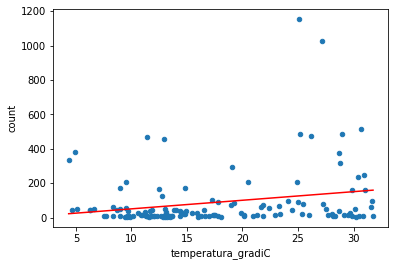

pearson:  0.22806595927778106  spearman:  0.2144955011511054  kendall:  0.1447135098108229


In [37]:
# correlazione tra fallimenti e temperatura in gradi
pearson, spearman , kendall = corr_Sensori(df_nuovo,meteo[0], 'count')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

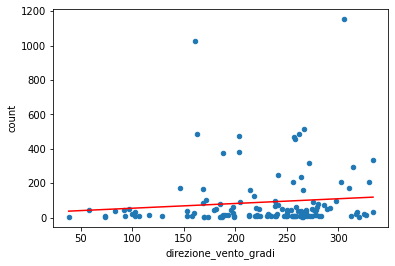

pearson:  0.10409814584424612  spearman:  0.1633181217738334  kendall:  0.11203626565999193


In [38]:
# correlazione tra fallimenti e temperatura in gradi
pearson, spearman , kendall = corr_Sensori(df_nuovo,meteo[1], 'count')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

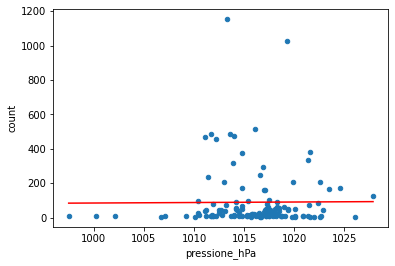

pearson:  0.007545695825587741  spearman:  0.032844038355451806  kendall:  0.026726863202463317


In [39]:
# correlazione tra fallimenti e temperatura in gradi
pearson, spearman , kendall = corr_Sensori(df_nuovo,meteo[2], 'count')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)

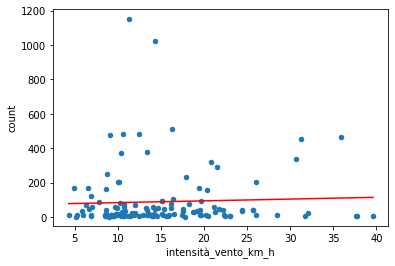

pearson:  0.04411409267491587  spearman:  0.05833479926161761  kendall:  0.04318064405645523


In [40]:
# correlazione tra fallimenti e temperatura in gradi
pearson, spearman , kendall = corr_Sensori(df_nuovo,meteo[3], 'count')
print('pearson: ', pearson, ' spearman: ', spearman, ' kendall: ', kendall)